In [12]:
!pip install emoji


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import NLTKWordTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [5]:
# получим список стоп слов.
nltk_stop_words = set(stopwords.words("russian"))
#Lemmatizing the text
wnl = WordNetLemmatizer()

EMOTIONS = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

mlflow_url = 'http://localhost:8080'

# Функция для преобразования эмоджи в слова
def emojis_words(text):
    
    # Модуль emoji: преобразование эмоджи в их словесные описания
    clean_text = emoji.demojize(text, delimiters=(" ", " "))
    
    # Редактирование текста путём замены ":" и" _", а так же - путём добавления пробела между отдельными словами
    clean_text = clean_text.replace(":", "").replace("_", " ")
    
    return clean_text

# функция нормализации и очистки текста.
def cleaner(text :str) -> str:

    # Пунктуация
    text = re.sub(r'[.,#!$%\^&\*;:{}=\-_`~()]',r'',text)

     #Эмотиконы
    text =emojis_words(text)

    # #unicode
    # text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)
    # text = re.sub(r'[^\x00-\x7f]',r'',text)

    # url/ссылки
    text = re.sub(r'http\S+', r'', text)

    #теггирование/nicknames
    text = re.sub('@[A-Za-z0-9_-]+',r'',text)# nickname

    #хэштеги
    text = re.sub(r'#([^\s]+)', r'\1', text)

    #удалим цифры
    text = ''.join([i for i in text if not i.isdigit()])

    #приведем к нижнему регистру
    text = text.lower()

    #удалим стоп слова
    stop_words_cleaned = []
    for word in text.split():
      if word not in nltk_stop_words:
        stop_words_cleaned.append(word)

    text = ' '.join(stop_words_cleaned)

    #приведем текст к изначальной форме.
    text= ' '.join([wnl.lemmatize(word) for word in text.split()])

    return text

# GoEmotion(djacon)

In [15]:
df = pd.read_csv('goemo.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      211225 non-null  object
 1   anger     211225 non-null  int64 
 2   disgust   211225 non-null  int64 
 3   fear      211225 non-null  int64 
 4   joy       211225 non-null  int64 
 5   sadness   211225 non-null  int64 
 6   surprise  211225 non-null  int64 
 7   neutral   211225 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 12.9+ MB


In [17]:
df['text'] = df['text'].apply(cleaner)

In [18]:
df.head(50)

,text,anger,disgust,fear,joy,sadness,surprise,neutral
0,эта игра причинила боль,0,0,0,0,1,0,0
1,>сексуальность должна групповой категорией отл...,0,0,0,0,0,0,0
2,правильно поступаешь тебе равно иди черту,0,0,0,0,0,0,1
3,чувак обожаю reddit,0,0,0,1,0,0,0
4,[имя] рядом ними рядом «соколом»,0,0,0,0,0,0,1
5,верно? учитывая это важный документ должен зна...,0,0,0,1,0,0,0
6,большой довольно популярный слышал самое содер...,1,0,0,0,0,0,0
7,это безумие училась супер [религийной] средней...,0,0,0,1,0,0,0
8,это очень мило,0,0,0,1,0,0,0
9,«пабы sponge blurb quaw haha gurr ha aaa» фина...,0,0,0,1,0,0,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hamming_loss, classification_report
import numpy as np

# 1. Подготовка данных
X = df['text']
y = df[EMOTIONS]

# 2. Векторизация текста
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# 3. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# 4. Обучение модели
model = MultiOutputClassifier(
    LogisticRegression(max_iter=1000, class_weight='balanced')
).fit(X_train, y_train)

# 5. Предсказания
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# 6. Оценка качества
print(f"Hamming Loss: {hamming_loss(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=EMOTIONS))


Hamming Loss: 0.2506

Classification Report:
              precision    recall  f1-score   support

       anger       0.27      0.63      0.38      6130
     disgust       0.09      0.63      0.15      1074
        fear       0.09      0.64      0.16       904
         joy       0.70      0.67      0.69     16530
     sadness       0.23      0.65      0.34      3745
    surprise       0.26      0.62      0.37      5790
     neutral       0.39      0.71      0.50     11185

   micro avg       0.34      0.66      0.45     45358
   macro avg       0.29      0.65      0.37     45358
weighted avg       0.45      0.66      0.51     45358
 samples avg       0.42      0.66      0.48     45358



c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

# CEDR

In [25]:
df = pd.read_csv('cedr.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7528 entries, 0 to 7527
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      7528 non-null   object
 1   anger     7528 non-null   int64 
 2   disgust   7528 non-null   int64 
 3   fear      7528 non-null   int64 
 4   joy       7528 non-null   int64 
 5   sadness   7528 non-null   int64 
 6   surprise  7528 non-null   int64 
 7   neutral   7528 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 470.6+ KB


In [27]:
df['text'] = df['text'].apply(cleaner)

In [28]:
df.sample(20)

,text,anger,disgust,fear,joy,sadness,surprise,neutral
3252,словам специалистов злоумышленники могут узнат...,0,0,0,0,0,0,1
7067,скучно,0,0,0,0,1,0,0
4414,могу успокоить тех боится воды никакого ощущен...,0,0,0,1,0,0,0
491,взял комплект приемник чудный беспроводное бат...,0,0,0,1,0,0,0
3752,ахха шли домой это чтото кидали друг друга сне...,0,0,0,1,0,0,0
1012,офицера полиции приехали дому летнего мужчины ...,0,0,0,0,0,0,1
5210,скорбим,0,0,0,0,1,0,0
3343,пользователи twitter выразили свое недоумение,0,0,0,0,0,1,0
6827,места веселой планете,0,0,0,0,1,0,0
6768,смотрю учебники расписание тетради плачу каник...,0,0,0,0,1,0,0


In [ ]:
# import matplotlib.pyplot as plt
# from IPython import display 
# from tqdm import tqdm

# # Инициализация интерактивного режима
# plt.ion()
# fig, ax = plt.subplots(figsize=(12, 6))
# batch_losses = []
# global_step = 0
# # Получаем общее количество примеров
# total_samples = len(df_train)

# # Start an MLflow run
# with mlflow.start_run():
#     mlflow.log_params({
#     'batch_size': BATCH_SIZE,
#     'learning_rate': LEARNING_RATE,
#     'epochs': EPOCHS
#     })
#     # Модифицированный цикл обучения
#     for epoch in tqdm(range(EPOCHS)):
#         model.train()
#         epoch_train_loss = 0
#         epoch_samples = 0  # Счетчик примеров в эпохе
        
#         for batch_num, batch in enumerate(train_loader):
#             optimizer.zero_grad()
            
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             labels = batch['labels'].to(device)

#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask,
#                 labels=labels
#             )

#             loss = outputs.loss
#             epoch_train_loss += loss.item()
            
#             loss.backward()
#             optimizer.step()
            
#             # Обновление графика каждые 10 батчей
#             # Обновление счетчика примеров
#             batch_size = input_ids.size(0)
#             epoch_samples += batch_size
#             if batch_num % 10 == 0:
#                 batch_losses.append(loss.item())
                
#                 ax.clear()
#                 ax.plot(range(len(batch_losses)), batch_losses, 'b-', label='Batch Loss')
                
#                 # Форматирование заголовка с примером
#                 title = (
#                     f"Real-Time Training Loss | Epoch {epoch+1}/{EPOCHS}\n"
#                     f"Samples: {epoch_samples:,}/{total_samples:,} "
#                     f"({epoch_samples/total_samples*100:.1f}%)"
#                 )
#                 ax.set_title(title)
                
#                 ax.set_xlabel('Batch Groups (every 10 batches)')
#                 ax.set_ylabel('Loss')
#                 ax.grid(True)
#                 ax.legend()
                
#                 display.display(fig)  # Для Jupyter
#                 display.clear_output(wait=True)  # Для Jupyter
#                 # plt.pause(0.01)  # Для скрипта вне Jupyter
                
#             global_step += 1
#         # Log the hyperparameters
#         mlflow.log_metric('train_loss',  epoch_train_loss / len(train_loader), step=epoch)
        

#     # Log the model

#     mlflow.pytorch.log_model(model,"model")
#     mlflow.pytorch.save_model(model,"./sm")
#     # Визуализация после эпохи
#     avg_epoch_loss = epoch_train_loss / len(train_loader)
#     print(f'Epoch {epoch+1} completed | Avg Loss: {avg_epoch_loss:.4f}')

# plt.ioff()
# plt.show()

In [3]:
!pip install gputil

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7441 sha256=fefbe555b27d172a3decea058e81374670bd8d1932b6d46fc10c12e36424fe12
  Stored in directory: c:\users\rvv19\appdata\local\pip\cache\wheels\92\a8\b7\d8a067c31a74de9ca252bbe53dea5f896faabd25d55f541037
Successfully built gputil



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pynvml


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
BASE_MODEL = 'sergeyzh/rubert-tiny-turbo'
mlflow_url = 'http://localhost:8080'
EMOTIONS = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

import mlflow
import numpy as np
import pandas as pd
import psutil
import GPUtil
import evaluate
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    pipeline,
)
from transformers.integrations import MLflowCallback
from transformers import TrainerCallback
from datasets import Dataset
from sklearn.model_selection import train_test_split



mlflow.set_tracking_uri(mlflow_url)
mlflow.set_experiment(f"CEDR {BASE_MODEL} trans")
mlflow.enable_system_metrics_logging()

# -----------------------------
# Callback для логирования метрик в MLflow
# -----------------------------
class MLflowLoggingCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            for key, value in logs.items():
                mlflow.log_metric(key, value, step=state.global_step)
        return control

# -----------------------------
# Инициализация GPUtil для мониторинга GPU
# -----------------------------
try:
    gpus = GPUtil.getGPUs()
    gpu_available = len(gpus) > 0
except Exception as e:
    print("GPU monitoring not available:", e)
    gpu_available = False
    
# -----------------------------
# Callback для логирования системных метрик (CPU, RAM и GPU)
# -----------------------------
class SystemMetricsCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        # Логирование CPU и RAM
        cpu_percent = psutil.cpu_percent(interval=None)
        memory_percent = psutil.virtual_memory().percent
        mlflow.log_metric("system_cpu_percent", cpu_percent, step=state.global_step)
        mlflow.log_metric("system_memory_percent", memory_percent, step=state.global_step)
        
        # Логирование GPU метрик с использованием GPUtil, если доступны
        if gpu_available:
            try:
                gpus = GPUtil.getGPUs()
                if gpus:
                    gpu = gpus[0]
                    gpu_util = gpu.load * 100  # load возвращает значение от 0 до 1
                    gpu_memory_used_percent = gpu.memoryUtil * 100
                    mlflow.log_metric("gpu_utilization", gpu_util, step=state.global_step)
                    mlflow.log_metric("gpu_memory_used_percent", gpu_memory_used_percent, step=state.global_step)
            except Exception as e:
                print("Ошибка при получении GPU метрик:", e)
        return control


# Загрузка данных из CSV
df = pd.read_csv("cedr.csv")

# -----------------------------
# 3. Преобразование one-hot меток в единую метку для многоклассовой классификации
# Предполагается, что ровно один из столбцов равен 1 для каждой строки
# -----------------------------

df['label'] = df[EMOTIONS].values.argmax(axis=1)
label2emotion = {0: "anger", 1: "disgust", 2: "fear", 3: "joy", 4: "sadness", 5: "surprise", 6: "neutral"}
df['emotion'] = df['label'].map(label2emotion)

# Разбиение данных на обучающую и валидационную выборки (20% для валидации)
# Стратифицированное разбиение для сохранения пропорций классов
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))

# -----------------------------
# 5. Создание объектов HuggingFace Dataset из pandas DataFrame
# -----------------------------
train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_df.reset_index(drop=True))

# -----------------------------
# 6. Инициализация токенизатора и токенизация текста
# -----------------------------
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

def tokenize_function(example):
    tokenized = tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)
    tokenized["label"] = example["label"]
    return tokenized

train_dataset = train_dataset.map(tokenize_function, batched=False)
val_dataset = val_dataset.map(tokenize_function, batched=False)

# Устанавливаем формат данных для работы с PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# -----------------------------
# 7. Инициализация модели для многоклассовой классификации (7 классов)
# -----------------------------
model = AutoModelForSequenceClassification.from_pretrained(BASE_MODEL, num_labels=7)

# -----------------------------
# 8. Определение параметров обучения с промежуточным логированием (каждые 50 шагов)
# -----------------------------
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    eval_steps=50,
    logging_strategy="steps",
    logging_steps=50,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    learning_rate=2e-5,
    logging_dir='./logs',
    report_to=["mlflow"],  # Логирование только в MLflow
)

# -----------------------------
# 9. Определение функции вычисления метрик (accuracy)
# -----------------------------
accuracy_metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# -----------------------------
# 10. Запуск MLflow run
# -----------------------------
mlflow.start_run()

# -----------------------------
# 11. Создание Trainer с указанными параметрами и callback'ами
# -----------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[MLflowCallback(), MLflowLoggingCallback(), SystemMetricsCallback()],
)

# -----------------------------
# 12. Обучение модели
# -----------------------------
trainer.train()

# -----------------------------
# 13. Оценка модели на валидационном наборе
# -----------------------------
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)

# -----------------------------
# 14. Сохранение модели в MLflow
# -----------------------------
# mlflow.pytorch.log_model(model, "model")
# mlflow.pytorch.save_model(model,'./sm1')
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)
mlflow.transformers.save_model(classifier,'./smp')
mlflow.transformers.log_model(classifier,'model')

mlflow.end_run()

# -----------------------------
# 15. Инференс: создание pipeline и пример предсказания
# -----------------------------
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)
example_text = "I am extremely joyful and happy today!"
prediction = classifier(example_text)
print("Prediction:", prediction)

# mlflow.transformers.save_model(classifier,'/smp')


Train set size: 6022
Validation set size: 1506


Map:   0%|          | 0/6022 [00:00<?, ? examples/s]

Map:   0%|          | 0/1506 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sergeyzh/rubert-tiny-turbo and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
2025/03/12 12:57:55 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
You are adding a <class 'transformers.integrations.integration_utils.MLflowCallback'> to the callbacks of this Trainer, but there is already one. The currentlist of callbacks is
:DefaultFlowCallback
MLflowCallback


  0%|          | 0/2259 [00:00<?, ?it/s]

c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


{'loss': 1.8586, 'grad_norm': 1.9924628734588623, 'learning_rate': 1.9557326250553343e-05, 'epoch': 0.07}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 1.7708549499511719, 'eval_accuracy': 0.4043824701195219, 'eval_runtime': 0.6326, 'eval_samples_per_second': 2380.516, 'eval_steps_per_second': 298.75, 'epoch': 0.07}
{'loss': 1.6824, 'grad_norm': 2.2305240631103516, 'learning_rate': 1.9114652501106684e-05, 'epoch': 0.13}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 1.5700836181640625, 'eval_accuracy': 0.4043824701195219, 'eval_runtime': 0.6209, 'eval_samples_per_second': 2425.398, 'eval_steps_per_second': 304.383, 'epoch': 0.13}
{'loss': 1.4652, 'grad_norm': 3.4583005905151367, 'learning_rate': 1.8671978751660026e-05, 'epoch': 0.2}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 1.4160499572753906, 'eval_accuracy': 0.4721115537848606, 'eval_runtime': 0.616, 'eval_samples_per_second': 2445.0, 'eval_steps_per_second': 306.843, 'epoch': 0.2}
{'loss': 1.3553, 'grad_norm': 5.327248573303223, 'learning_rate': 1.822930500221337e-05, 'epoch': 0.27}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 1.268545389175415, 'eval_accuracy': 0.6420982735723771, 'eval_runtime': 0.6108, 'eval_samples_per_second': 2465.551, 'eval_steps_per_second': 309.422, 'epoch': 0.27}
{'loss': 1.2556, 'grad_norm': 3.5254621505737305, 'learning_rate': 1.7786631252766712e-05, 'epoch': 0.33}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 1.1481742858886719, 'eval_accuracy': 0.6799468791500664, 'eval_runtime': 0.6633, 'eval_samples_per_second': 2270.528, 'eval_steps_per_second': 284.947, 'epoch': 0.33}
{'loss': 1.1907, 'grad_norm': 3.259821653366089, 'learning_rate': 1.7343957503320053e-05, 'epoch': 0.4}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 1.0692532062530518, 'eval_accuracy': 0.6892430278884463, 'eval_runtime': 0.6161, 'eval_samples_per_second': 2444.484, 'eval_steps_per_second': 306.778, 'epoch': 0.4}
{'loss': 1.0889, 'grad_norm': 5.812127113342285, 'learning_rate': 1.6901283753873398e-05, 'epoch': 0.46}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 1.0046932697296143, 'eval_accuracy': 0.6985391766268261, 'eval_runtime': 0.6261, 'eval_samples_per_second': 2405.355, 'eval_steps_per_second': 301.867, 'epoch': 0.46}
{'loss': 1.0607, 'grad_norm': 2.426111936569214, 'learning_rate': 1.645861000442674e-05, 'epoch': 0.53}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.9476093053817749, 'eval_accuracy': 0.7071713147410359, 'eval_runtime': 0.6152, 'eval_samples_per_second': 2447.934, 'eval_steps_per_second': 307.211, 'epoch': 0.53}
{'loss': 0.9847, 'grad_norm': 5.285865783691406, 'learning_rate': 1.601593625498008e-05, 'epoch': 0.6}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.9049691557884216, 'eval_accuracy': 0.7158034528552457, 'eval_runtime': 0.6353, 'eval_samples_per_second': 2370.49, 'eval_steps_per_second': 297.492, 'epoch': 0.6}
{'loss': 0.871, 'grad_norm': 2.7660162448883057, 'learning_rate': 1.5573262505533425e-05, 'epoch': 0.66}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.8660314679145813, 'eval_accuracy': 0.7324037184594954, 'eval_runtime': 0.6326, 'eval_samples_per_second': 2380.56, 'eval_steps_per_second': 298.755, 'epoch': 0.66}
{'loss': 0.96, 'grad_norm': 7.099055767059326, 'learning_rate': 1.5130588756086767e-05, 'epoch': 0.73}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.8270184397697449, 'eval_accuracy': 0.750332005312085, 'eval_runtime': 0.6417, 'eval_samples_per_second': 2346.728, 'eval_steps_per_second': 294.51, 'epoch': 0.73}
{'loss': 0.9742, 'grad_norm': 4.244746208190918, 'learning_rate': 1.4687915006640108e-05, 'epoch': 0.8}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.8001986145973206, 'eval_accuracy': 0.7589641434262948, 'eval_runtime': 0.6496, 'eval_samples_per_second': 2318.232, 'eval_steps_per_second': 290.934, 'epoch': 0.8}
{'loss': 0.8846, 'grad_norm': 6.516067981719971, 'learning_rate': 1.424524125719345e-05, 'epoch': 0.86}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.772910475730896, 'eval_accuracy': 0.7656042496679947, 'eval_runtime': 0.6308, 'eval_samples_per_second': 2387.552, 'eval_steps_per_second': 299.633, 'epoch': 0.86}
{'loss': 0.8374, 'grad_norm': 3.513608694076538, 'learning_rate': 1.380256750774679e-05, 'epoch': 0.93}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.7573221325874329, 'eval_accuracy': 0.7715803452855245, 'eval_runtime': 0.6511, 'eval_samples_per_second': 2313.118, 'eval_steps_per_second': 290.292, 'epoch': 0.93}
{'loss': 0.8231, 'grad_norm': 5.78059196472168, 'learning_rate': 1.3359893758300134e-05, 'epoch': 1.0}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.7427656054496765, 'eval_accuracy': 0.7675962815405046, 'eval_runtime': 0.6421, 'eval_samples_per_second': 2345.316, 'eval_steps_per_second': 294.332, 'epoch': 1.0}
{'loss': 0.7835, 'grad_norm': 7.775612831115723, 'learning_rate': 1.2917220008853477e-05, 'epoch': 1.06}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.7284327149391174, 'eval_accuracy': 0.7742363877822045, 'eval_runtime': 0.6374, 'eval_samples_per_second': 2362.582, 'eval_steps_per_second': 296.499, 'epoch': 1.06}
{'loss': 0.745, 'grad_norm': 7.053619861602783, 'learning_rate': 1.247454625940682e-05, 'epoch': 1.13}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.7166739702224731, 'eval_accuracy': 0.7782204515272244, 'eval_runtime': 0.6361, 'eval_samples_per_second': 2367.517, 'eval_steps_per_second': 297.119, 'epoch': 1.13}
{'loss': 0.7347, 'grad_norm': 3.508232831954956, 'learning_rate': 1.2031872509960161e-05, 'epoch': 1.2}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6997937560081482, 'eval_accuracy': 0.7788844621513944, 'eval_runtime': 0.6851, 'eval_samples_per_second': 2198.321, 'eval_steps_per_second': 275.885, 'epoch': 1.2}
{'loss': 0.7341, 'grad_norm': 4.383516311645508, 'learning_rate': 1.1589198760513502e-05, 'epoch': 1.26}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.686141312122345, 'eval_accuracy': 0.7828685258964143, 'eval_runtime': 0.6391, 'eval_samples_per_second': 2356.429, 'eval_steps_per_second': 295.727, 'epoch': 1.26}
{'loss': 0.6804, 'grad_norm': 5.28529167175293, 'learning_rate': 1.1146525011066844e-05, 'epoch': 1.33}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6833047270774841, 'eval_accuracy': 0.7835325365205843, 'eval_runtime': 0.6526, 'eval_samples_per_second': 2307.555, 'eval_steps_per_second': 289.594, 'epoch': 1.33}
{'loss': 0.707, 'grad_norm': 12.867156982421875, 'learning_rate': 1.0703851261620187e-05, 'epoch': 1.39}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.66912442445755, 'eval_accuracy': 0.7875166002656042, 'eval_runtime': 0.6537, 'eval_samples_per_second': 2303.657, 'eval_steps_per_second': 289.104, 'epoch': 1.39}
{'loss': 0.7383, 'grad_norm': 9.645358085632324, 'learning_rate': 1.0261177512173528e-05, 'epoch': 1.46}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6624565720558167, 'eval_accuracy': 0.7868525896414342, 'eval_runtime': 0.6398, 'eval_samples_per_second': 2353.836, 'eval_steps_per_second': 295.402, 'epoch': 1.46}
{'loss': 0.731, 'grad_norm': 3.677278995513916, 'learning_rate': 9.818503762726871e-06, 'epoch': 1.53}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6648130416870117, 'eval_accuracy': 0.7861885790172642, 'eval_runtime': 0.6421, 'eval_samples_per_second': 2345.463, 'eval_steps_per_second': 294.351, 'epoch': 1.53}
{'loss': 0.7179, 'grad_norm': 9.408500671386719, 'learning_rate': 9.375830013280214e-06, 'epoch': 1.59}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6507211923599243, 'eval_accuracy': 0.7915006640106241, 'eval_runtime': 0.6773, 'eval_samples_per_second': 2223.423, 'eval_steps_per_second': 279.035, 'epoch': 1.59}
{'loss': 0.7137, 'grad_norm': 10.277100563049316, 'learning_rate': 8.933156263833556e-06, 'epoch': 1.66}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6420018076896667, 'eval_accuracy': 0.796812749003984, 'eval_runtime': 0.6446, 'eval_samples_per_second': 2336.363, 'eval_steps_per_second': 293.209, 'epoch': 1.66}
{'loss': 0.6823, 'grad_norm': 8.837343215942383, 'learning_rate': 8.490482514386897e-06, 'epoch': 1.73}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6349707245826721, 'eval_accuracy': 0.7948207171314741, 'eval_runtime': 0.6637, 'eval_samples_per_second': 2269.152, 'eval_steps_per_second': 284.774, 'epoch': 1.73}
{'loss': 0.6833, 'grad_norm': 14.052383422851562, 'learning_rate': 8.04780876494024e-06, 'epoch': 1.79}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6296197175979614, 'eval_accuracy': 0.8027888446215139, 'eval_runtime': 0.6531, 'eval_samples_per_second': 2305.785, 'eval_steps_per_second': 289.371, 'epoch': 1.79}
{'loss': 0.6426, 'grad_norm': 13.15983772277832, 'learning_rate': 7.605135015493582e-06, 'epoch': 1.86}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6282073259353638, 'eval_accuracy': 0.8007968127490039, 'eval_runtime': 0.6588, 'eval_samples_per_second': 2286.102, 'eval_steps_per_second': 286.901, 'epoch': 1.86}
{'loss': 0.7316, 'grad_norm': 11.782262802124023, 'learning_rate': 7.162461266046924e-06, 'epoch': 1.93}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6222200989723206, 'eval_accuracy': 0.800132802124834, 'eval_runtime': 0.6445, 'eval_samples_per_second': 2336.69, 'eval_steps_per_second': 293.25, 'epoch': 1.93}
{'loss': 0.5742, 'grad_norm': 6.211203575134277, 'learning_rate': 6.719787516600266e-06, 'epoch': 1.99}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6189992427825928, 'eval_accuracy': 0.8027888446215139, 'eval_runtime': 0.6627, 'eval_samples_per_second': 2272.433, 'eval_steps_per_second': 285.186, 'epoch': 1.99}
{'loss': 0.6055, 'grad_norm': 5.510145664215088, 'learning_rate': 6.277113767153609e-06, 'epoch': 2.06}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6190655827522278, 'eval_accuracy': 0.8047808764940239, 'eval_runtime': 0.6578, 'eval_samples_per_second': 2289.359, 'eval_steps_per_second': 287.31, 'epoch': 2.06}
{'loss': 0.6391, 'grad_norm': 11.105640411376953, 'learning_rate': 5.834440017706951e-06, 'epoch': 2.12}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6181250214576721, 'eval_accuracy': 0.8047808764940239, 'eval_runtime': 0.6647, 'eval_samples_per_second': 2265.753, 'eval_steps_per_second': 284.347, 'epoch': 2.12}
{'loss': 0.6055, 'grad_norm': 10.826202392578125, 'learning_rate': 5.391766268260292e-06, 'epoch': 2.19}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6134809851646423, 'eval_accuracy': 0.8054448871181938, 'eval_runtime': 0.6542, 'eval_samples_per_second': 2302.045, 'eval_steps_per_second': 288.902, 'epoch': 2.19}
{'loss': 0.6078, 'grad_norm': 8.934516906738281, 'learning_rate': 4.949092518813634e-06, 'epoch': 2.26}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6147929430007935, 'eval_accuracy': 0.8047808764940239, 'eval_runtime': 0.6811, 'eval_samples_per_second': 2211.09, 'eval_steps_per_second': 277.487, 'epoch': 2.26}
{'loss': 0.611, 'grad_norm': 24.58729362487793, 'learning_rate': 4.5064187693669766e-06, 'epoch': 2.32}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6129364371299744, 'eval_accuracy': 0.8047808764940239, 'eval_runtime': 0.6522, 'eval_samples_per_second': 2309.282, 'eval_steps_per_second': 289.81, 'epoch': 2.32}
{'loss': 0.6054, 'grad_norm': 8.290237426757812, 'learning_rate': 4.06374501992032e-06, 'epoch': 2.39}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6083243489265442, 'eval_accuracy': 0.8067729083665338, 'eval_runtime': 0.6771, 'eval_samples_per_second': 2224.341, 'eval_steps_per_second': 279.15, 'epoch': 2.39}
{'loss': 0.6128, 'grad_norm': 15.895148277282715, 'learning_rate': 3.621071270473661e-06, 'epoch': 2.46}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6055836081504822, 'eval_accuracy': 0.8074369189907038, 'eval_runtime': 0.6717, 'eval_samples_per_second': 2241.992, 'eval_steps_per_second': 281.366, 'epoch': 2.46}
{'loss': 0.6804, 'grad_norm': 7.093669414520264, 'learning_rate': 3.1783975210270036e-06, 'epoch': 2.52}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6052801609039307, 'eval_accuracy': 0.8054448871181938, 'eval_runtime': 0.6684, 'eval_samples_per_second': 2253.033, 'eval_steps_per_second': 282.751, 'epoch': 2.52}
{'loss': 0.5988, 'grad_norm': 15.209307670593262, 'learning_rate': 2.7357237715803453e-06, 'epoch': 2.59}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.601967990398407, 'eval_accuracy': 0.8087649402390438, 'eval_runtime': 0.6646, 'eval_samples_per_second': 2265.868, 'eval_steps_per_second': 284.362, 'epoch': 2.59}
{'loss': 0.5758, 'grad_norm': 17.48622703552246, 'learning_rate': 2.2930500221336875e-06, 'epoch': 2.66}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.6004229784011841, 'eval_accuracy': 0.8087649402390438, 'eval_runtime': 0.6845, 'eval_samples_per_second': 2200.276, 'eval_steps_per_second': 276.13, 'epoch': 2.66}
{'loss': 0.6272, 'grad_norm': 11.989859580993652, 'learning_rate': 1.8503762726870297e-06, 'epoch': 2.72}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.5975317358970642, 'eval_accuracy': 0.8087649402390438, 'eval_runtime': 0.6651, 'eval_samples_per_second': 2264.174, 'eval_steps_per_second': 284.149, 'epoch': 2.72}
{'loss': 0.6284, 'grad_norm': 10.849893569946289, 'learning_rate': 1.407702523240372e-06, 'epoch': 2.79}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.5966426730155945, 'eval_accuracy': 0.8094289508632138, 'eval_runtime': 0.6698, 'eval_samples_per_second': 2248.308, 'eval_steps_per_second': 282.158, 'epoch': 2.79}
{'loss': 0.5924, 'grad_norm': 2.972259998321533, 'learning_rate': 9.65028773793714e-07, 'epoch': 2.86}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.5962011218070984, 'eval_accuracy': 0.8094289508632138, 'eval_runtime': 0.7162, 'eval_samples_per_second': 2102.771, 'eval_steps_per_second': 263.894, 'epoch': 2.86}
{'loss': 0.5675, 'grad_norm': 14.536211967468262, 'learning_rate': 5.223550243470563e-07, 'epoch': 2.92}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.5954173803329468, 'eval_accuracy': 0.8087649402390438, 'eval_runtime': 0.6804, 'eval_samples_per_second': 2213.524, 'eval_steps_per_second': 277.793, 'epoch': 2.92}
{'loss': 0.6235, 'grad_norm': 27.909141540527344, 'learning_rate': 7.968127490039842e-08, 'epoch': 2.99}


  0%|          | 0/189 [00:00<?, ?it/s]

{'eval_loss': 0.5950875878334045, 'eval_accuracy': 0.8087649402390438, 'eval_runtime': 0.6719, 'eval_samples_per_second': 2241.515, 'eval_steps_per_second': 281.306, 'epoch': 2.99}
{'train_runtime': 75.3808, 'train_samples_per_second': 239.663, 'train_steps_per_second': 29.968, 'train_loss': 0.82227230874138, 'epoch': 3.0}


  0%|          | 0/189 [00:00<?, ?it/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Evaluation results: {'eval_loss': 0.5950879454612732, 'eval_accuracy': 0.8087649402390438, 'eval_runtime': 0.6782, 'eval_samples_per_second': 2220.456, 'eval_steps_per_second': 278.663, 'epoch': 3.0}


c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
2025/03/12 12:59:14 WARNING mlflow.utils.requirements_utils: Found torch version (2.2.2+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.2.2' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2025/03/12 12:59:14 WARNING mlflow.utils.environment: On Windows, timeout is not supported for model requirement inference. Therefore, the operation is not bound by a timeout and may hang indefinitely. If it hangs, please consider specifying the signature manually.
2025/03/12 12:59:25 WARNING 

Prediction: [[{'label': 'LABEL_0', 'score': 0.015407368540763855}, {'label': 'LABEL_1', 'score': 0.009619110263884068}, {'label': 'LABEL_2', 'score': 0.007033100351691246}, {'label': 'LABEL_3', 'score': 0.9212712049484253}, {'label': 'LABEL_4', 'score': 0.01408296450972557}, {'label': 'LABEL_5', 'score': 0.02196928672492504}, {'label': 'LABEL_6', 'score': 0.010616900399327278}]]


In [10]:
import mlflow.pytorch
from transformers import AutoTokenizer, pipeline

# Задайте путь к сохранённой модели (например, директория "model", как было указано при логировании)
model_uri = "./smp"

# Загрузка модели из MLflow
loaded_model = mlflow.pytorch.load_model(model_uri)

# Инициализируем токенизатор, соответствующий используемой модели
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_uri)

# Создаем pipeline для инференса
classifier = pipeline("text-classification", model=loaded_model, tokenizer=tokenizer, return_all_scores=True)



MlflowException: Model does not have the "pytorch" flavor

In [21]:
import mlflow.pytorch
from transformers import AutoTokenizer, pipeline

# Задайте путь к сохранённой модели (например, директория "model", как было указано при логировании)
model_uri = "./smp"


# Создаем pipeline для инференса
classifier =  mlflow.transformers.load_model(model_uri) 


2025/03/12 18:26:56 WARNING mlflow.transformers.model_io: Could not specify device parameter for this pipeline type.Falling back to loading the model with the default device.


In [ ]:
# Пример текста для предсказания
example_text = "Я счастлив"
EMOTIONS = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
# Выполняем предсказание
prediction = classifier(example_text, return_all_scores=True)

prediction = list(map(lambda pred: {**pred, "label": EMOTIONS[int(pred["label"][6:])] } if pred.get("label", "").startswith("LABEL_") else pred, prediction[0]))
print("Prediction:", prediction)

Prediction: [{'label': 'anger', 'score': 0.013769811019301414}, {'label': 'disgust', 'score': 0.008547131903469563}, {'label': 'fear', 'score': 0.00553023861721158}, {'label': 'joy', 'score': 0.9261977076530457}, {'label': 'sadness', 'score': 0.011247304268181324}, {'label': 'surprise', 'score': 0.018123449757695198}, {'label': 'neutral', 'score': 0.016584303230047226}]


In [31]:
# Пример текста для предсказания
example_text = "Я счастлив"
EMOTIONS = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
# Выполняем предсказание
prediction = classifier(example_text, return_all_scores=True)

prediction = {EMOTIONS[i]: round(prediction[0][i]['score'], 4) for i in range(len(EMOTIONS))} #   map(lambda pred: {**pred, "label": EMOTIONS[int(pred["label"][6:])] } if pred.get("label", "").startswith("LABEL_") else pred, prediction[0])
print("Prediction:", prediction)


Prediction: {'anger': 0.0138, 'disgust': 0.0085, 'fear': 0.0055, 'joy': 0.9262, 'sadness': 0.0112, 'surprise': 0.0181, 'neutral': 0.0166}


c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [30]:

prediction[0][0]['score']

0.013769811019301414

In [12]:
import mlflow.transformers
from transformers import pipeline

EMOTIONS = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

# Задайте URI модели (например, "model" или "runs:/<run_id>/model")
model_uri = "./smp"

# Загружаем сохранённый pipeline
classifier = mlflow.transformers.load_model(model_uri)

example_text = "Я счастлив"

# Выполняем предсказание
predictions = classifier(example_text)

# Функция для замены ярлыков в одном предсказании (словаре)
replace_label = lambda pred: {**pred, "label": EMOTIONS[int(pred["label"][6:])] } \
    if isinstance(pred, dict) and pred.get("label", "").startswith("LABEL_") else pred

# Если pipeline возвращает список словарей
if predictions and isinstance(predictions[0], dict):
    converted = list(map(replace_label, predictions))
# Если возвращается список списков словарей
elif predictions and isinstance(predictions[0], list):
    converted = list(map(lambda group: list(map(replace_label, group)), predictions))
else:
    converted = predictions

print("Predictions:", converted)

2025/03/12 16:14:42 WARNING mlflow.transformers.model_io: Could not specify device parameter for this pipeline type.Falling back to loading the model with the default device.


Predictions: [{'label': 'joy', 'score': 0.9261977076530457}]


In [14]:

# Загружаем сохранённый pipeline
classifier = mlflow.transformers.load_model(model_uri, return_all_scores=True)

example_text = "Я счастлив"

# Выполняем предсказание
predictions = classifier(example_text)

# Функция для замены ярлыка на имя эмоции
def replace_label(pred):
    if isinstance(pred, dict) and pred.get("label", "").startswith("LABEL_"):
        idx = int(pred["label"][6:])  # Извлекаем число после "LABEL_"
        pred["label"] = EMOTIONS[idx]
    return pred

# Обрабатываем все предсказания:
# Если predictions – список словарей, то обрабатываем его напрямую,
# если список списков, то обрабатываем каждую группу отдельно.
if predictions and isinstance(predictions[0], dict):
    converted = [replace_label(pred) for pred in predictions]
elif predictions and isinstance(predictions[0], list):
    converted = [ [ replace_label(pred) for pred in group ] for group in predictions ]
else:
    converted = predictions

print("All predictions:", converted)

2025/03/12 16:18:28 WARNING mlflow.transformers.model_io: Could not specify device parameter for this pipeline type.Falling back to loading the model with the default device.


All predictions: [[{'label': 'anger', 'score': 0.013769811019301414}, {'label': 'disgust', 'score': 0.008547131903469563}, {'label': 'fear', 'score': 0.00553023861721158}, {'label': 'joy', 'score': 0.9261977076530457}, {'label': 'sadness', 'score': 0.011247304268181324}, {'label': 'surprise', 'score': 0.018123449757695198}, {'label': 'neutral', 'score': 0.016584303230047226}]]


c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


# XED

In [ ]:
df = pd.read_csv('xed.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      17528 non-null  object
 1   anger     17528 non-null  int64 
 2   disgust   17528 non-null  int64 
 3   fear      17528 non-null  int64 
 4   joy       17528 non-null  int64 
 5   sadness   17528 non-null  int64 
 6   surprise  17528 non-null  int64 
 7   neutral   17528 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.1+ MB


In [ ]:
df['text'] = df['text'].apply(cleaner)

In [ ]:
df.sample(30)

,text,anger,disgust,fear,joy,sadness,surprise,neutral
10063,малышу придётся сыграть,1,0,1,0,0,0,0
16326,думаешь солдаты русские?,0,0,0,0,0,1,0
5508,хочешь дать один?,0,0,0,0,0,1,0
14200,недостаточно могущественна,0,0,0,0,1,0,0
15957,потрясающе,0,0,0,0,0,1,0
13726,порядке,0,0,0,1,0,0,0
12079,приближаются,0,0,1,0,0,0,0
571,убегай,1,0,0,0,1,0,0
13195,удовольствием,0,0,0,1,0,0,1
15167,уверена твоими родителями сложно,0,0,0,0,1,0,0


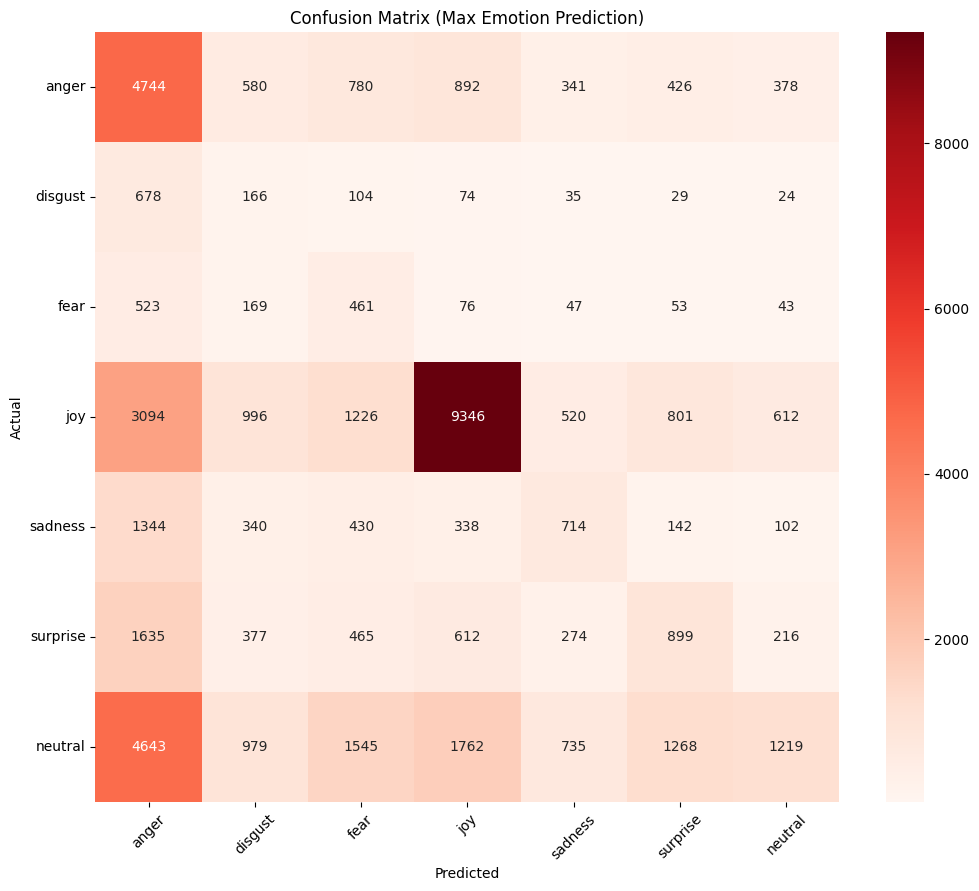

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Создаем "мультиклассовое" представление (только для визуализации)
y_test_flat = y_test.idxmax(axis=1)
y_pred_flat = pd.DataFrame(y_pred, columns=emotion_columns).idxmax(axis=1)

# Строим матрицу
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test_flat, y_pred_flat, labels=emotion_columns)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=emotion_columns, 
            yticklabels=emotion_columns)
plt.title('Confusion Matrix (Max Emotion Prediction)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# 5. Оценка модели
def evaluate_model(model, data_loader, device):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            logits = outputs.logits
            preds = torch.sigmoid(logits) > 0.5
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return {
        'hamming_loss': hamming_loss(true_labels, predictions),
        'f1_micro': f1_score(true_labels, predictions, average='micro'),
        'f1_macro': f1_score(true_labels, predictions, average='macro'),
        'f1_weigted': f1_score(true_labels, predictions, average='weighted')
    }

metrics = evaluate_model(model, val_loader, device)
print(f"\nValidation Metrics:")
print(f"Hamming Loss: {metrics['hamming_loss']:.4f}")
print(f"Micro F1: {metrics['f1_micro']:.4f}")
print(f"Macro F1: {metrics['f1_macro']:.4f}")
print(f"weigted F1: {metrics['f1_weigted']:.4f}")


Validation Metrics:
Hamming Loss: 0.1288
Micro F1: 0.4697
Macro F1: 0.3492
weigted F1: 0.4423


In [ ]:
#'sergeyzh/rubert-tiny-turbo'
metrics = evaluate_model(model, val_loader, device)
print(f"\nValidation Metrics:")
print(f"Hamming Loss: {metrics['hamming_loss']:.4f}")
print(f"Micro F1: {metrics['f1_micro']:.4f}")
print(f"Macro F1: {metrics['f1_macro']:.4f}")
print(f"weigted F1: {metrics['f1_weigted']:.4f}")


Validation Metrics:
Hamming Loss: 0.1251
Micro F1: 0.5013
Macro F1: 0.3707
weigted F1: 0.4757


In [ ]:
#sentence-transformers/LaBSE - 1 эпоха
#'sergeyzh/rubert-tiny-turbo'
metrics = evaluate_model(model, val_loader, device)
print(f"\nValidation Metrics:")
print(f"Hamming Loss: {metrics['hamming_loss']:.4f}")
print(f"Micro F1: {metrics['f1_micro']:.4f}")
print(f"Macro F1: {metrics['f1_macro']:.4f}")
print(f"weigted F1: {metrics['f1_weigted']:.4f}")


Validation Metrics:
Hamming Loss: 0.1241
Micro F1: 0.4954
Macro F1: 0.3701
weigted F1: 0.4681


# сравнение датасетов


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# 1. Проверка распределения эмоций (хи-квадрат)
def compare_emotions_distribution(df1, df2):
    # Создаем таблицы частот
    freq1 = df1['emotion'].value_counts().reindex(df1['emotion'].unique(), fill_value=0)
    freq2 = df2['emotion'].value_counts().reindex(df1['emotion'].unique(), fill_value=0)
    
    # Строим contingency table
    contingency_table = pd.concat([freq1, freq2], axis=1).T.fillna(0)
    
    # Тест хи-квадрат
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test: p-value = {p}")
    return p

# 2. Сравнение длины текстов (тест Колмогорова-Смирнова)
def compare_text_length(df1, df2):
    df1['length'] = df1['text'].apply(len)
    df2['length'] = df2['text'].apply(len)
    
    # Тест Колмогорова-Смирнова
    ks_stat, p_value = stats.ks_2samp(df1['length'], df2['length'])
    print(f"Kolmogorov-Smirnov test: p-value = {p_value}")
    
    # Дополнительно: тест Манна-Уитни
    u_stat, p_mann = stats.mannwhitneyu(df1['length'], df2['length'])
    print(f"Mann-Whitney U test: p-value = {p_mann}")
    return p_value

# 3. Классификатор для обнаружения смещения
def dataset_classifier_test(df1, df2):
    # Создаем общий датасет с метками
    df1['dataset'] = 0
    df2['dataset'] = 1
    combined = pd.concat([df1, df2])
    
    # Векторизация текста
    tfidf = TfidfVectorizer(max_features=1000)
    X = tfidf.fit_transform(combined['text'])
    y = combined['dataset']
    
    # Разделение на train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Обучение модели
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Предсказание
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Classifier accuracy: {acc:.8f}")
    return acc

# 4. Визуализация распределений
def plot_distributions(df1, df2):
    plt.figure(figsize=(12, 5))
    
    # Распределение эмоций
    plt.subplot(1, 2, 1)
    df1['emotion'].value_counts().plot(kind='bar', alpha=0.5, label='Dataset 1')
    df2['emotion'].value_counts().plot(kind='bar', alpha=0.5, label='Dataset 2')
    plt.title('Emotion Distribution')
    plt.legend()
    
    # Распределение длин текстов
    plt.subplot(1, 2, 2)
    plt.hist(df1['text'].apply(len), alpha=0.5, label='Dataset 1')
    plt.hist(df2['text'].apply(len), alpha=0.5, label='Dataset 2')
    plt.title('Text Length Distribution')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

## CEDR - XED

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Загрузка датасетов (предполагается, что в каждом файле есть колонки "text" и "emotion")
dataset1 = pd.read_csv("CEDR.csv")
dataset2 = pd.read_csv("XED.csv")
dataset1['emotion'] = dataset1[EMOTIONS].idxmax(axis=1)
dataset2['emotion'] = dataset2[EMOTIONS].idxmax(axis=1)
#############################################
# 1. Бинарная классификация источников данных
#############################################

# Добавляем метку источника: 0 для dataset1 и 1 для dataset2
dataset1['source'] = 0
dataset2['source'] = 1

# Объединяем датасеты
combined_df = pd.concat([dataset1, dataset2], ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)  # перемешиваем данные

# Преобразование текста в признаки с использованием TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_combined = vectorizer.fit_transform(combined_df['text'])
y_combined = combined_df['source']

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Обучаем классификатор (логистическая регрессия)
clf_binary = LogisticRegression(max_iter=1000)
clf_binary.fit(X_train, y_train)
y_pred = clf_binary.predict(X_test)

print("=== Binary Classification Report ===")
print(classification_report(y_test, y_pred))
# Если точность близка к 50%, модели не удается отличить источник, что указывает на схожесть датасетов.

#####################################################
# 2. Кросс-доменальная классификация для эмоций
#####################################################

# a) Обучение на dataset1, тестирование на dataset2
vectorizer_emotion = TfidfVectorizer(max_features=10000)
X_train_emotion = vectorizer_emotion.fit_transform(dataset1['text'])
X_test_emotion = vectorizer_emotion.transform(dataset2['text'])
y_train_emotion = dataset1['emotion']
y_test_emotion = dataset2['emotion']

clf_emotion = LogisticRegression(max_iter=1000)
clf_emotion.fit(X_train_emotion, y_train_emotion)
y_pred_emotion = clf_emotion.predict(X_test_emotion)

print("\n=== Cross-Domain Emotion Classification Report ===")
print("Train on dataset1, Test on dataset2:")
print(classification_report(y_test_emotion, y_pred_emotion))

# b) При желании можно провести обратный эксперимент: обучение на dataset2, тестирование на dataset1
vectorizer_emotion_2 = TfidfVectorizer(max_features=10000)
X_train_emotion_2 = vectorizer_emotion_2.fit_transform(dataset2['text'])
X_test_emotion_2 = vectorizer_emotion_2.transform(dataset1['text'])
y_train_emotion_2 = dataset2['emotion']
y_test_emotion_2 = dataset1['emotion']

clf_emotion_2 = LogisticRegression(max_iter=1000)
clf_emotion_2.fit(X_train_emotion_2, y_train_emotion_2)
y_pred_emotion_2 = clf_emotion_2.predict(X_test_emotion_2)

print("\nTrain on dataset2, Test on dataset1:")
print(classification_report(y_test_emotion_2, y_pred_emotion_2))

# Интерпретация:
# - Если модель для бинарной классификации показывает точность около 50%, это говорит о том,
#   что датасеты сложно отличить по текстовым характеристикам.
# - Если кросс-доменальная классификация эмоций даёт схожие результаты с внутренней валидацией,
#   можно предположить, что распределения эмоций и лингвистические особенности текстов схожи.


=== Binary Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      2271
           1       0.87      0.97      0.92      5246

    accuracy                           0.88      7517
   macro avg       0.88      0.82      0.84      7517
weighted avg       0.88      0.88      0.87      7517


=== Cross-Domain Emotion Classification Report ===
Train on dataset1, Test on dataset2:
              precision    recall  f1-score   support

       anger       0.48      0.00      0.01      6903
     disgust       0.00      0.00      0.00      1660
        fear       0.37      0.02      0.04      1904
         joy       0.19      0.50      0.27      2241
     neutral       0.09      0.50      0.15      1617
     sadness       0.19      0.25      0.22      1745
    surprise       0.33      0.03      0.05      1458

    accuracy                           0.14     17528
   macro avg       0.24      0.19      0.11     17528
weigh

c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Train on dataset2, Test on dataset1:
              precision    recall  f1-score   support

       anger       0.05      0.76      0.10       411
     disgust       0.00      0.00      0.00         0
        fear       0.44      0.25      0.32       585
         joy       0.58      0.20      0.29      1551
     neutral       0.31      0.00      0.01      3043
     sadness       0.43      0.17      0.24      1370
    surprise       0.46      0.08      0.13       568

    accuracy                           0.14      7528
   macro avg       0.33      0.21      0.16      7528
weighted avg       0.40      0.14      0.15      7528



c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Загрузка датасетов (предполагается, что в каждом файле есть колонки "text" и "emotion")
dataset1 = pd.read_csv("goemo.csv")
dataset2 = pd.read_csv("XED.csv")
dataset1['emotion'] = dataset1[EMOTIONS].idxmax(axis=1)
dataset2['emotion'] = dataset2[EMOTIONS].idxmax(axis=1)
#############################################
# 1. Бинарная классификация источников данных
#############################################

# Добавляем метку источника: 0 для dataset1 и 1 для dataset2
dataset1['source'] = 0
dataset2['source'] = 1

# Объединяем датасеты
combined_df = pd.concat([dataset1, dataset2], ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)  # перемешиваем данные

# Преобразование текста в признаки с использованием TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_combined = vectorizer.fit_transform(combined_df['text'])
y_combined = combined_df['source']

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Обучаем классификатор (логистическая регрессия)
clf_binary = LogisticRegression(max_iter=1000)
clf_binary.fit(X_train, y_train)
y_pred = clf_binary.predict(X_test)

print("=== Binary Classification Report ===")
print(classification_report(y_test, y_pred))
# Если точность близка к 50%, модели не удается отличить источник, что указывает на схожесть датасетов.

#####################################################
# 2. Кросс-доменальная классификация для эмоций
#####################################################

# a) Обучение на dataset1, тестирование на dataset2
vectorizer_emotion = TfidfVectorizer(max_features=10000)
X_train_emotion = vectorizer_emotion.fit_transform(dataset1['text'])
X_test_emotion = vectorizer_emotion.transform(dataset2['text'])
y_train_emotion = dataset1['emotion']
y_test_emotion = dataset2['emotion']

clf_emotion = LogisticRegression(max_iter=1000)
clf_emotion.fit(X_train_emotion, y_train_emotion)
y_pred_emotion = clf_emotion.predict(X_test_emotion)

print("\n=== Cross-Domain Emotion Classification Report ===")
print("Train on dataset1, Test on dataset2:")
print(classification_report(y_test_emotion, y_pred_emotion))

# b) При желании можно провести обратный эксперимент: обучение на dataset2, тестирование на dataset1
vectorizer_emotion_2 = TfidfVectorizer(max_features=10000)
X_train_emotion_2 = vectorizer_emotion_2.fit_transform(dataset2['text'])
X_test_emotion_2 = vectorizer_emotion_2.transform(dataset1['text'])
y_train_emotion_2 = dataset2['emotion']
y_test_emotion_2 = dataset1['emotion']

clf_emotion_2 = LogisticRegression(max_iter=1000)
clf_emotion_2.fit(X_train_emotion_2, y_train_emotion_2)
y_pred_emotion_2 = clf_emotion_2.predict(X_test_emotion_2)

print("\nTrain on dataset2, Test on dataset1:")
print(classification_report(y_test_emotion_2, y_pred_emotion_2))

# Интерпретация:
# - Если модель для бинарной классификации показывает точность около 50%, это говорит о том,
#   что датасеты сложно отличить по текстовым характеристикам.
# - Если кросс-доменальная классификация эмоций даёт схожие результаты с внутренней валидацией,
#   можно предположить, что распределения эмоций и лингвистические особенности текстов схожи.


=== Binary Classification Report ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     63348
           1       0.83      0.23      0.36      5278

    accuracy                           0.94     68626
   macro avg       0.88      0.61      0.66     68626
weighted avg       0.93      0.94      0.92     68626


=== Cross-Domain Emotion Classification Report ===
Train on dataset1, Test on dataset2:
              precision    recall  f1-score   support

       anger       0.49      0.15      0.23      6903
     disgust       0.56      0.01      0.02      1660
        fear       0.48      0.04      0.08      1904
         joy       0.27      0.64      0.38      2241
     neutral       0.09      0.49      0.15      1617
     sadness       0.59      0.11      0.18      1745
    surprise       0.24      0.17      0.20      1458

    accuracy                           0.21     17528
   macro avg       0.39      0.23      0.18     17528
weigh

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Загрузка датасетов (предполагается, что в каждом файле есть колонки "text" и "emotion")
dataset1 = pd.read_csv("goemo.csv")
dataset2 = pd.read_csv("CEDR.csv")
dataset1['emotion'] = dataset1[EMOTIONS].idxmax(axis=1)
dataset2['emotion'] = dataset2[EMOTIONS].idxmax(axis=1)
#############################################
# 1. Бинарная классификация источников данных
#############################################

# Добавляем метку источника: 0 для dataset1 и 1 для dataset2
dataset1['source'] = 0
dataset2['source'] = 1

# Объединяем датасеты
combined_df = pd.concat([dataset1, dataset2], ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)  # перемешиваем данные

# Преобразование текста в признаки с использованием TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_combined = vectorizer.fit_transform(combined_df['text'])
y_combined = combined_df['source']

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

# Обучаем классификатор (логистическая регрессия)
clf_binary = LogisticRegression(max_iter=1000)
clf_binary.fit(X_train, y_train)
y_pred = clf_binary.predict(X_test)

print("=== Binary Classification Report ===")
print(classification_report(y_test, y_pred))
# Если точность близка к 50%, модели не удается отличить источник, что указывает на схожесть датасетов.

#####################################################
# 2. Кросс-доменальная классификация для эмоций
#####################################################

# a) Обучение на dataset1, тестирование на dataset2
vectorizer_emotion = TfidfVectorizer(max_features=10000)
X_train_emotion = vectorizer_emotion.fit_transform(dataset1['text'])
X_test_emotion = vectorizer_emotion.transform(dataset2['text'])
y_train_emotion = dataset1['emotion']
y_test_emotion = dataset2['emotion']

clf_emotion = LogisticRegression(max_iter=1000)
clf_emotion.fit(X_train_emotion, y_train_emotion)
y_pred_emotion = clf_emotion.predict(X_test_emotion)

print("\n=== Cross-Domain Emotion Classification Report ===")
print("Train on dataset1, Test on dataset2:")
print(classification_report(y_test_emotion, y_pred_emotion))

# b) При желании можно провести обратный эксперимент: обучение на dataset2, тестирование на dataset1
vectorizer_emotion_2 = TfidfVectorizer(max_features=10000)
X_train_emotion_2 = vectorizer_emotion_2.fit_transform(dataset2['text'])
X_test_emotion_2 = vectorizer_emotion_2.transform(dataset1['text'])
y_train_emotion_2 = dataset2['emotion']
y_test_emotion_2 = dataset1['emotion']

clf_emotion_2 = LogisticRegression(max_iter=1000)
clf_emotion_2.fit(X_train_emotion_2, y_train_emotion_2)
y_pred_emotion_2 = clf_emotion_2.predict(X_test_emotion_2)

print("\nTrain on dataset2, Test on dataset1:")
print(classification_report(y_test_emotion_2, y_pred_emotion_2))

# Интерпретация:
# - Если модель для бинарной классификации показывает точность около 50%, это говорит о том,
#   что датасеты сложно отличить по текстовым характеристикам.
# - Если кросс-доменальная классификация эмоций даёт схожие результаты с внутренней валидацией,
#   можно предположить, что распределения эмоций и лингвистические особенности текстов схожи.


=== Binary Classification Report ===
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     63401
           1       0.91      0.23      0.36      2225

    accuracy                           0.97     65626
   macro avg       0.94      0.61      0.67     65626
weighted avg       0.97      0.97      0.97     65626


=== Cross-Domain Emotion Classification Report ===
Train on dataset1, Test on dataset2:
              precision    recall  f1-score   support

       anger       0.14      0.28      0.19       411
     disgust       0.00      0.00      0.00         0
        fear       0.69      0.41      0.51       585
         joy       0.42      0.56      0.48      1551
     neutral       0.56      0.70      0.62      3043
     sadness       0.80      0.16      0.26      1370
    surprise       0.28      0.10      0.15       568

    accuracy                           0.48      7528
   macro avg       0.41      0.32      0.32      7528
weigh

c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


Train on dataset2, Test on dataset1:


c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       anger       0.50      0.00      0.01     33884
     disgust       0.00      0.00      0.00      3958
        fear       0.44      0.09      0.16      4129
         joy       0.56      0.44      0.49     79352
     neutral       0.32      0.69      0.44     55298
     sadness       0.15      0.27      0.19     13964
    surprise       0.26      0.03      0.05     20640

    accuracy                           0.37    211225
   macro avg       0.32      0.22      0.19    211225
weighted avg       0.42      0.37      0.32    211225



c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

df1 = pd.read_csv('XED.csv')
df2 = pd.read_csv('goemo.csv')

df1['text'] = df1['text'].apply(cleaner)
df2['text'] = df2['text'].apply(cleaner)
df1['emotion'] = df1[EMOTIONS].idxmax(axis=1)
df2['emotion'] = df2[EMOTIONS].idxmax(axis=1)

Chi-square test: p-value = 0.0
Kolmogorov-Smirnov test: p-value = 0.0
Mann-Whitney U test: p-value = 0.0
Classifier accuracy: 0.93040539


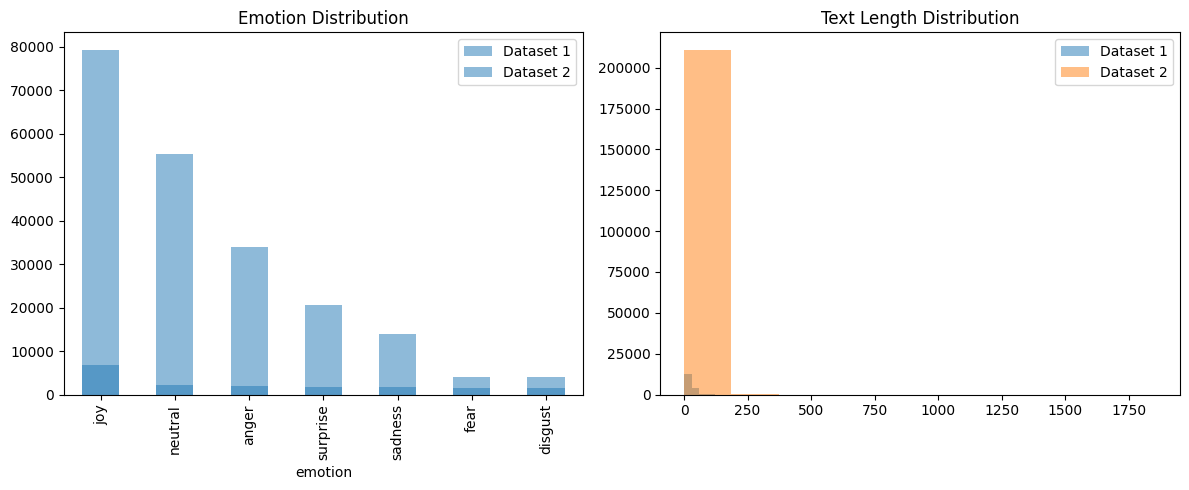


Interpretation:
- Emotion distributions are DIFFERENT (p <= 0.05)
- Texts are DIFFERENT (classifier can distinguish datasets) acc = 0.9304053857138693


In [ ]:


# Запуск всех тестов
p_emotion = compare_emotions_distribution(df1, df2)
p_length = compare_text_length(df1, df2)
classifier_acc = dataset_classifier_test(df1, df2)
plot_distributions(df1, df2)

# Интерпретация результатов
print("\nInterpretation:")
if p_emotion > 0.05:
    print("- Emotion distributions are similar (p > 0.05)")
else:
    print("- Emotion distributions are DIFFERENT (p <= 0.05)")

if classifier_acc < 0.6:
    print("- Texts are similar (classifier cannot distinguish datasets)")
else:
    print(f"- Texts are DIFFERENT (classifier can distinguish datasets) acc = {classifier_acc}")

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Загрузка датасетов (предполагается, что файлы 'dataset1.csv' и 'dataset2.csv'
# содержат колонки "text" и "emotion")
dataset1 = pd.read_csv("XED.csv")
dataset2 = pd.read_csv("CEDR.csv")
dataset1['emotion'] = dataset1[EMOTIONS].idxmax(axis=1)
dataset2['emotion'] = dataset2[EMOTIONS].idxmax(axis=1)
# Инициализация модели для получения эмбеддингов BERT.
# Здесь используется легкая модель для ускорения вычислений.
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

#############################################
# 1. Бинарная классификация источников данных
#############################################

# Добавляем метку источника: 0 для dataset1, 1 для dataset2
dataset1['source'] = 0
dataset2['source'] = 1

# Объединяем датасеты и перемешиваем записи
combined_df = pd.concat([dataset1, dataset2], ignore_index=True)
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Вычисляем эмбеддинги для всех текстов
texts_combined = combined_df['text'].tolist()
embeddings_combined = model.encode(texts_combined, show_progress_bar=True)

# Подготовка признаков и меток
X = embeddings_combined
y = combined_df['source'].values

# Разбивка на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение классификатора (логистическая регрессия)
clf_binary = LogisticRegression(max_iter=1000)
clf_binary.fit(X_train, y_train)
y_pred = clf_binary.predict(X_test)

print("=== Отчет по бинарной классификации источников (BERT эмбеддинги) ===")
print(classification_report(y_test, y_pred))


#############################################
# 2. Кросс-доменальная классификация эмоций
#############################################

# Вычисляем эмбеддинги для каждого датасета отдельно
texts1 = dataset1['text'].tolist()
texts2 = dataset2['text'].tolist()

embeddings1 = model.encode(texts1, show_progress_bar=True)
embeddings2 = model.encode(texts2, show_progress_bar=True)

# a) Обучение на dataset1, тестирование на dataset2
X_train_emotion = embeddings1
y_train_emotion = dataset1['emotion'].values

X_test_emotion = embeddings2
y_test_emotion = dataset2['emotion'].values

clf_emotion = LogisticRegression(max_iter=1000)
clf_emotion.fit(X_train_emotion, y_train_emotion)
y_pred_emotion = clf_emotion.predict(X_test_emotion)

print("\n=== Кросс-доменальная классификация эмоций (Обучение: dataset1, Тестирование: dataset2) ===")
print(classification_report(y_test_emotion, y_pred_emotion))

# b) Обратный эксперимент: обучение на dataset2, тестирование на dataset1
clf_emotion_2 = LogisticRegression(max_iter=1000)
clf_emotion_2.fit(embeddings2, dataset2['emotion'].values)
y_pred_emotion_2 = clf_emotion_2.predict(embeddings1)

print("\n=== Кросс-доменальная классификация эмоций (Обучение: dataset2, Тестирование: dataset1) ===")
print(classification_report(dataset1['emotion'].values, y_pred_emotion_2))

c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/783 [00:00<?, ?it/s]

=== Отчет по бинарной классификации источников (BERT эмбеддинги) ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5222
           1       0.91      0.82      0.86      2295

    accuracy                           0.92      7517
   macro avg       0.92      0.89      0.90      7517
weighted avg       0.92      0.92      0.92      7517



Batches:   0%|          | 0/548 [00:00<?, ?it/s]

Batches:   0%|          | 0/236 [00:00<?, ?it/s]


=== Кросс-доменальная классификация эмоций (Обучение: dataset1, Тестирование: dataset2) ===
              precision    recall  f1-score   support

       anger       0.05      0.75      0.10       411
     disgust       0.00      0.00      0.00         0
        fear       0.09      0.01      0.02       585
         joy       0.25      0.11      0.15      1551
     neutral       0.50      0.00      0.01      3043
     sadness       0.20      0.01      0.02      1370
    surprise       0.23      0.02      0.03       568

    accuracy                           0.07      7528
   macro avg       0.19      0.13      0.05      7528
weighted avg       0.32      0.07      0.05      7528



c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita


=== Кросс-доменальная классификация эмоций (Обучение: dataset2, Тестирование: dataset1) ===
              precision    recall  f1-score   support

       anger       0.45      0.04      0.07      6903
     disgust       0.00      0.00      0.00      1660
        fear       0.14      0.12      0.13      1904
         joy       0.17      0.27      0.21      2241
     neutral       0.10      0.41      0.16      1617
     sadness       0.15      0.23      0.18      1745
    surprise       0.20      0.32      0.24      1458

    accuracy                           0.15     17528
   macro avg       0.17      0.20      0.14     17528
weighted avg       0.26      0.15      0.12     17528



c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rvv19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo